 #                                                      TP Séparateurs à Vaste Marge

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import random

# Partie 1:

In [36]:
import numpy as np

def load_breastcancer(filename):
    """
    Cette fonction lit le fichier filename, par exemple
    filename = 'wdbc_M1_B0.data'
    Elle retourne 
    X : une matrice de caracteristiques
    y : un vecteur des classes tel que si y[i] = 1, la tumeur est maligne
        et si y[i] = -1, la tumeur est benigne

    Pour plus d'infos sur la base de donnees,
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29
    """

    data = np.loadtxt(filename, delimiter=',')

    # la colonne 0 ne nous interesse pas ici
    y = data[:, 1] * 2 - 1
    X = data[:, 2:]

    # Standardisation de la matrice
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    return X, y


In [37]:
X,y = load_breastcancer(r'C:\Users\bouah\OneDrive\Bureau\wdbcM1B0.data')

X = np.array(X)
y = np.array(y)
n = len(X)
m = len(X[0])

# Parite 2:

# Question 2.1 :

Soit la fonction $F(v,a,\epsilon) = \frac{1}{2} \sum_{j=1}^{m} v_{j}^{2} + c\sum_{j=1}^{m} \epsilon_{j}$

On a $\underset{v,a,\epsilon}{minF} = \underset{v,a}{min}(\underset{\epsilon}{minF}) $

Or $\epsilon_{j} \ge  0 $ et $\epsilon_{j} \ge 1-y_{i}(x_{i}^{T} v + a)$


Donc $\epsilon_{j} \ge max(0, 1-y_{i}(x_{i}^{T} v + a)) \ge 0$


On déduit donc que : $\underset{v,a,\epsilon}{minF} = \underset{v,a}{min}[\frac{1}{2} \sum_{j=1}^{m} v_{j}^{2} + c\sum_{j=1}^{m} max(0, 1-y_{i}(x_{i}^{T} v + a))]$


# Question 2.2 :

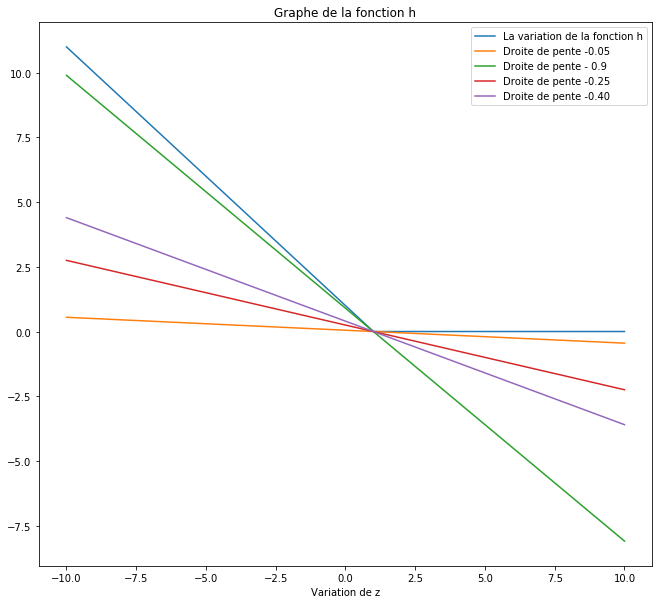

In [38]:
plt.figure(figsize=(11,10))

abscisse = np.linspace(-10, 10, 1000)
ordonnee = list(map (lambda z : max(0, 1 - z) , abscisse))


ordonnee_1 = list(map (lambda z :  0.05 - 0.05 * z , abscisse))
ordonnee_2 = list(map (lambda z :  0.9 - 0.9 * z , abscisse))
ordonnee_3 = list(map (lambda z :  0.25 - 0.25 * z , abscisse))
ordonnee_4 = list(map (lambda z :  0.40 - 0.40 * z , abscisse))


plt.plot(abscisse , ordonnee, label = "La variation de la fonction h")

plt.plot(abscisse , ordonnee_1, label = "Droite de pente -0.05")
plt.plot(abscisse , ordonnee_2, label = "Droite de pente - 0.9")
plt.plot(abscisse , ordonnee_3, label = "Droite de pente -0.25")
plt.plot(abscisse , ordonnee_4, label = "Droite de pente -0.40")

plt.title("Graphe de la fonction h")

plt.xlabel("Variation de z")
plt.legend()

plt.show()

Graphiquement, on voit que la fonction $h$ est convexe comme

Elle est dérivable sur $\mathopen{]}- \infty\,;1\mathclose{[}$ donc $\partial f(x) = \{\nabla(f(x))\} = \{-1\}$

Elle est dérivable sur $\mathopen{]} 1 \,;+\infty\mathclose{[}$ donc $\partial f(x) = \{\nabla(f(x))\} = \{0\}$

En $1$ la fonction n'est pas dérivable, Toutes les droites où la pente varie de $-1$ jusqu'à $0$ sont au dessous du graphe de h, alors :

Donc  $\partial f(1) = \mathopen{[}- 1\,;0\mathclose{]}$

# Question 2.3 :

Soit $M$ l'application linéaire suivante $M : (v,a) \longrightarrow y_{i}(X_{i}^{T}v + a)_{1 \leq i \leq n}$

Soit $H$ l'application séparable suivante $H : z \longrightarrow \sum_{i = 1}^{n}h(z_{i})$, le h est définie dans l'énoncé

Soit $N$ l'application séparable suivante $N : (v,a) \longrightarrow \frac{1}{2}\sum_{j=0}^{m} v_{j}^{2}$

On a $f(v,a) =  N(v,a) + H(M(v,a))$


Donc on obtient le résultat : $\partial f(v,a) = \partial N(v,a) + cM^{T}\partial H(M(v,a)))$ car  $0 \in relint(dom(N) - M dom(H))$


Calculons maintenant $\partial N$ :

On a  $N(v+h) = N(v) + <v\cdot h> + o(h)$

Donc $\partial N(v,a) = \{(v,0)\}$

Calculons $\partial H$ :

On a $\partial H(z) = \partial h(z_{1}) \times \partial h(z_{2})  ... \times \partial h(z_{n})$


# Question 2.4 :

In [39]:
def calculef(v,a,c):
    f = (1/2)*(np.linalg.norm(v)**2)
    for i in range(len(X)):
        f+=c*np.max([0,1-y[i]*(X[i].dot(np.transpose(v))+a)])
    return f

In [40]:
#sous-gradient de N
def sgradientdeN(v,a):
    m = len(v)
    resultat = np.zeros(m+1)
    resultat[0:m] = v
    resultat[m] = 0
    return resultat


# un sous-gradient de H
def sgradiendeH(z):
    n = len(z)
    Gradient = np.zeros(n)
    for i in range(n):
        if(z[i] == 1):
            Gradient[i] = random.uniform(-1,0)
        if(z[i]<1):
            Gradient[i] = -1
        if(z[i]>1):
            Gradient[i] = 0
    return Gradient


#La valeur de l'opperateur M
def OperatorM(v,a):
    n = len(y)
    M = np.zeros(n)
    for i in range(n):
        M[i] = y[i]*(X[i].dot(np.transpose(v))+a)
    return M


#matrice de l'adjoint de l'application M
def matrixofM():
    M = np.zeros((n,m+1))
    for i in range(n):
        for j in range(m):
            M[i][j] = y[i]*X[i][j]
        M[i][m] = y[i]
    return np.transpose(M)


# Un des sous-gradient de f 
def sgradientdeF(v,a,c):
    M = matrixofM()
    SousGradient = sgradientdeN(v,a) + c*M.dot(sgradiendeH(OperatorM(v,a)))
    return SousGradient



# Question 2.5 :

In [41]:
#méthode de sous-gradient
def methode(c,epsilon):
    v = np.zeros(m)
    a=0
    k = 0
    avant = calculef(v,a,c)
    v,a  = v-sgradientdeF(v,a,c)[0:m]/(k+1),a-sgradientdeF(v,a,c)[m]/(k+1)
    apres = calculef(v,a,c)
    k+=1
    while(np.abs(apres-avant)>epsilon):
        avant = apres
        v,a  = v-(sgradientdeF(v,a,c)[0:m]/(k+1)),a-(sgradientdeF(v,a,c)[m]/(k+1))
        apres = calculef(v,a,c)
        k+=1
    return (calculef(v,a,c),calculef(np.zeros(m),0,c))

In [42]:
methode(1,0.01)

(67.03351177800242, 569.0)

# Partie 3:

# Question 3.1 :

on a $\mathbb{E}[f_{I}(v,a)] = \sum_{i = 1}^{n} P(I=i) f_{i}(v,a)$ or I suit une loi uniforme, donc $ P(I=i)=\frac{1}{n}$

D'où $\mathbb{E}[f_{I}(v,a)] = \sum_{i = 1}^{n} \frac{1}{n} f_{i}(v,a)$

Donc $\mathbb{E}[f_{I}(v,a)] = \sum_{i = 1}^{n} \frac{1}{n} (\frac{1}{2} \sum_{j=1}^{m} v_{j}^2 + cn\times max(0, 1-y_{i}(x_{i}^T v+a)))$

Donc $\mathbb{E}[f_{I}(v,a)] = \frac{1}{2} \sum_{j=1}^{m} v_{j}^2 + c \sum_{i = 1}^n max(0, 1-y_{i}(x_{i}^T v+a))$

Finalement on obtient : $\mathbb{E}[f_{I}(v,a)] = f(v,a)$

# Question 3.2 :

On a $f_{i}(v,a) = N(v,a) + cn \times h(M(v,a))$

Où M est l'applicaion qui à $(v,a)$ fait associer $y_{i}(x_{i}^T v+a)$

Donc $\partial f_{i}(v,a) = \partial (N(v,a)) + cn \times M^T \partial h((M(v,a))$ car $0 \in relint(dom(N) - M dom(H))$

Le N et le h sont les memes que das les question précédantes alors que M change

# Question 3.3:

In [43]:
#matrice de l'application linéaire
def matriceDelapp(indice):
    Matrix = np.zeros(m+1)
    for i in range(m):
        Matrix[i] = y[indice]*X[indice][i]
    Matrix[m] = y[indice]
    
    return Matrix


#valeur de l'application linéaire
def calculedeM(v,a,indice):
    return y[indice]*(X[indice].dot(v)+a)

In [44]:
#un sous-gradient de h
def subgradientdeh(z):
    gradient = 0
    if(z == 1):
        Gradient = random.uniform(-1,0)
    if(z<1):
         Gradient = -1
    if(z>1):
         Gradient = 0  
    return Gradient


#un sous gradient de f
def Fgradient(v,a,indice):
    gradient = sgradientdeN(v,a) + n*np.transpose(matriceDelapp(indice)).dot(subgradientdeh(calculedeM(v,a,indice)))
    return gradient



In [45]:
#méthode de sous-gradient stochastique
def stoch(epsilon):
    indice = random.choice([i for i in range(n)])
    v = np.zeros(m)
    a = 0
    k = 0
    avant = calculef(v,a,1)
    v = v-Fgradient(v,a,indice)[0:m]/(k+1)
    a = a-Fgradient(v,a,indice)[m]/(k+1)
    apres = calculef(v,a,1)
    k+=1
    while(np.abs(apres-avant)>epsilon):
        indice = random.choice([i for i in range(n)])
        avant = apres
        v = v-Fgradient(v,a,indice)[0:m]/(k+1)
        a = a-Fgradient(v,a,indice)[m]/(k+1)
        apres = calculef(v,a,1)
        k+=1
    return (calculef(v,a,1),calculef(np.zeros(m),0,1))



In [46]:
stoch(0.01)

(48.34183132088784, 569.0)

# Partie 4:

# Question 4.1:

Le lagrangien associé au problème 1 est donné par :


$L(v,\epsilon, \gamma, \lambda) = \frac{1}{2} \sum_{j = 1}^{m} v_{j}^2 + c \sum_{i = 1}^n \epsilon_{i} - \sum_{i = 1}^n \gamma_{i} \epsilon_{i} + \sum_{i = 1}^n \lambda_{i}(1 -\epsilon_{i} - y_{i}(x_{i}^T v + a))$
avec les $\lambda_{i}$ et les $\gamma_{i}$ sont positives

# Question 4.2:

Soit $g(x,\phi) =  \frac{-1}{2\rho} \phi^2 + \frac{\rho}{2} ( max(0, x + \rho^{-1} \phi)^2$

Si $x > - \rho^{-1} \phi$ :

Alors $g(x,\phi) = \frac{-1}{2\rho} \phi^2 + \frac{\rho}{2} (x + \rho^{-1} \phi)^2$

Donc $\nabla_{x}g(x,\phi) =  \rho (x + \rho^{-1} \phi)$ et $\nabla_{\phi}g(x,\phi) =  x$

De meme si $x < - \rho^{-1} \phi$

Alors $g(x,\phi) = \frac{-1}{2\rho} \phi^2$

Donc $\nabla_{x}g(x,\phi) =  0$ et $\nabla_{\phi}g(x,\phi) =  \frac{-\phi}{\rho}$

Donc $\nabla_{x}g(x,\phi)  = \rho max(0,x + \rho^{-1} \phi)$

Et $\nabla_{\phi}g(x,\phi) =  max(\frac{- \phi}{\rho}, x)$

En $x = - \rho^{-1} \phi$  on : 

$\lim_{h^\to 0^+} \frac{g(\frac{-\phi}{\rho} + h, \phi) - g(\frac{-\phi}{\rho}, \phi)}{h} = 0$ 

$\lim_{h^\to 0^-} \frac{g(\frac{-\phi}{\rho} + h, \phi) - g(\frac{-\phi}{\rho}, \phi)}{h} = 0$ 

et 

$\nabla_{x}g(\frac{-\phi}{\rho},\phi) = 0$

On conclut finalement que : $\nabla_{x}g(x,\phi) = \rho max(0,x + \rho^{-1} \phi)$

De meme on a :

$\lim_{h^\to 0^+} \frac{g(x, \frac{-\phi}{\rho} + h) - g(x, \frac{-\phi}{\rho})}{h} = \frac{-\phi}{\rho}$ 

$\lim_{h^\to 0^-} \frac{g(x, \frac{-\phi}{\rho} + h) - g(x, \frac{-\phi}{\rho})}{h} = \frac{-\phi}{\rho}$ 

et 

$\nabla_{\phi}g(\frac{-\phi}{\rho},\phi) = \frac{-\phi}{\rho}$

On conclut finalement que 

$\nabla_{\phi}g(x,\phi) =  max(\frac{- \phi}{\rho}, x)$

Finalement en trouve les memes formules indiquées dans l'énoncé pour chaque $x$ et $\phi$ réels

# Question 4.3:

Nous utilisons le théorème de croissance des pentes

La dérivée par rapport à $x$ est croissante en fonction de $x$, donc d'après le théorème de croissance des pentes la fonction $x \rightarrow g(x,\phi)$ est convexe 

De meme la la dérivé par rapport à $\phi$ est décroissante en fonction de $\phi$, donc d'après le théorème de croissance des pentes la fonction $x \rightarrow g(x,\phi)$ est concave


# Question 4.4:

In [21]:
#valeur de g
def g(x, phi):
    return - 0.5 * phi**2 / 2 + max(0, x + phi/2) ** 2

In [22]:
#valeur de Lp
def Lp(v, a,epsilon, phi , psi):
    eps = sum(epsilon)
    g_1 = sum(g(-epsilon_,phi_ ) for epsilon_, phi_ in zip(epsilon, phi))
    g_2 =  0
    for i in range(X.shape[0]):
        g_2 += g(-epsilon[i] + 1 - y[i]* (np.dot(X[i], v) + a), psi[i])
    return 0.5 * np.linalg.norm(v) ** 2 + eps +  g_1 + g_2

In [23]:
#dérivé par rapport à v
def gradV(v, a,epsilon, phi , psi):
    resultat = v
    for i in range(n):
        resultat = resultat - y[i]*X[i]*2*np.max([0,1-epsilon[i]-y[i]*(X[i].dot(np.transpose(v))+a)+0.5*psi[i]])
    return resultat

In [24]:
#dérivé par rapport à a
def gradA(v, a,epsilon, phi , psi):
    resultat = 0
    for i in range(n):
        resultat = resultat - y[i]*2*np.max([0,1-epsilon[i]-y[i]*(X[i].dot(np.transpose(v))+a)+0.5*psi[i]])
    return resultat

In [25]:
#dérivé par rapport à epsilon
def gradEpsilon(v, a,epsilon, phi , psi):
    resultat = np.zeros(n)
    for i in range(n):
        resultat[i] = 1 - 2*np.max([0,1-epsilon[i]-y[i]*(X[i].dot(np.transpose(v))+a)+0.5*psi[i]]) - 2*np.max([0,0.5*phi[i]-epsilon[i]])
    return resultat

In [26]:
#méthode de sous-gradient
def methode2(arr,phi , psi):
    k=0
    v = np.zeros(m)
    a=0
    epsilon = np.zeros(n)
    v,a,epsilon = v - gradV(v, a,epsilon, phi , psi)/(k+500),a - gradA(v, a,epsilon, phi , psi)/(k+500),epsilon - gradEpsilon(v, a,epsilon, phi , psi)/(k+500)
    k+=1
    
    #norme du gradient on l'a choisie égale au max des nomes de ses composantes suivant v,a et epsilon
    while(np.linalg.norm(gradV(v, a,epsilon, phi , psi))>arr or np.linalg.norm(gradA(v, a,epsilon, phi , psi))>arr or np.linalg.norm(gradEpsilon(v, a,epsilon, phi , psi))>arr):
        v,a,epsilon = v - gradV(v, a,epsilon, phi , psi)/(k+500),a - gradA(v, a,epsilon, phi , psi)/(k+500),epsilon - gradEpsilon(v, a,epsilon, phi , psi)/(k+500)
        k+=1
    return (Lp(v, a,epsilon, phi , psi),Lp(np.zeros(m),0,np.zeros(n), phi , psi))

In [27]:
phi = np.array([0 for k in range(X.shape[0])])
psi = np.array([0 for k in range(X.shape[0])])
methode2(1,phi , psi)

(-112.60811315520208, 569.0)

# Question 4.5 :

In [28]:
#dérivée par rapport à phi
def LpPhi(v, a,epsilon, phi , psi):
    resutlat = np.zeros(n)
    for i in range(n):
        resutlat[i] = max(-epsilon[i],-0.5*phi[i])
    return resutlat

In [29]:
#dérivée par rapport à psi
def LpPsi(v, a,epsilon, phi , psi):
    resutlat = np.zeros(n)
    for i in range(n):
        resutlat[i] = max(1-epsilon[i]-y[i]*(X[i].dot(np.transpose(v))+a),-0.5*psi[i])
    return resutlat

In [30]:
#gradient de Lp
def LpGradient(v, a,epsilon, phi , psi):
    return[LpPhi(v, a,epsilon, phi , psi),LpPsi(v, a,epsilon, phi , psi)]

# Question 4.6 :

In [33]:
def lagrangientAug():
    phi = np.array([0 for k in range(X.shape[0])])
    psi = np.array([0 for k in range(X.shape[0])])
    for k in range(2000):  
        v,a,epsilon = methode2(1,phi , psi)[0],methode2(1,phi , psi)[1],methode2(1,phi , psi)[2]
        phi,psi = phi +2*LpPhi(v, a,epsilon, phi , psi),psi +2*LpPsi(v, a,epsilon, phi , psi)        
    return (calculef(v, a,1),calculef(np.zeros(m),0,1))

In [34]:
lagrangientAug()

27.07896947812546


# Partie 5:

De ce qu'on a vue dans les résultats, la méthode stochastique est plus éfficaque que la méthode normale, la méthode du gradient augmentée est la meilleur mais elle prend vraiment beaucoup du temps, donc personellemnt je préfere d'utiliser la méthode  de sous-gradient stochastique car elle donne un bon résultat en un temps qui n'est pas trop grand.